# Classification
## Proof of Concept

First import needed modules and load the dataset in complete

In [9]:
# Imports for the notebook
# General imports
import pandas as pd
import numpy as np

# Visualization frameworks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

# Importing selfbuild modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import modules.DataLoader as DataLoader

covid19 = DataLoader.load_covid19()

covid19.head(5)

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
ObjectId,,,,,,,,,,,,,,,,,
45167592,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,2020-10-19,0,-9,2020-09-30,0,1,0,Nicht übermittelt
45167593,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,2020-10-19,0,-9,2020-08-24,0,1,0,Nicht übermittelt
45167594,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-26,0,1,0,Nicht übermittelt
45167595,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt
45167596,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt


# First classification of Death or not:

1.  Create the class feature and join to the dataframe. 
2.  Select the features "Altersgruppe", "Geschlecht", "Bundesland" and "Landkreis".
3.  Make "Altersgruppe" a ordinal class.
4.  Build a classification model.

In [15]:
# Load the death_case_test and features
covid19_death_test, feats = DataLoader.load_covid19_for_deathcase()

print(feats)
covid19.head(5)

['Bundesland', 'Landkreis', 'Altersgruppe', 'Geschlecht', 'Meldedatum', 'Deathcase']


,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
ObjectId,,,,,,,,,,,,,,,,,
45167592,1,Schleswig-Holstein,SK Flensburg,A00-A04,M,1,0,2020-09-30,1001,2020-10-19,0,-9,2020-09-30,0,1,0,Nicht übermittelt
45167593,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-08-24,1001,2020-10-19,0,-9,2020-08-24,0,1,0,Nicht übermittelt
45167594,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-26,0,1,0,Nicht übermittelt
45167595,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-25,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt
45167596,1,Schleswig-Holstein,SK Flensburg,A05-A14,M,1,0,2020-09-26,1001,2020-10-19,0,-9,2020-09-21,0,1,1,Nicht übermittelt


In [14]:
print("Current count of NaN values:")
covid19_death_test.isna().sum()

Current count of NaN values:


Bundesland         0
Landkreis          0
Altersgruppe     422
Geschlecht      1130
Meldedatum         0
Deathcase          0
dtype: int64

In [5]:
# Lets look in which class the nan values appear:
covid19_death_test[covid19_death_test["Deathcase"] == True].isna().sum()

Bundesland      0
Landkreis       0
Altersgruppe    0
Geschlecht      4
Meldedatum      0
Deathcase       0
dtype: int64

In [6]:
# Only four of the Deathcases got unkown values, so we can drop them from the dataset
covid19_death_test = covid19_death_test.dropna()

print("Cleaned count of NaN values")
covid19_death_test.isna().sum()

Cleaned count of NaN values


Bundesland      0
Landkreis       0
Altersgruppe    0
Geschlecht      0
Meldedatum      0
Deathcase       0
dtype: int64

              precision    recall  f1-score   support

       False       0.97      1.00      0.98     53590
        True       0.41      0.02      0.04      1872

    accuracy                           0.97     55462
   macro avg       0.69      0.51      0.51     55462
weighted avg       0.95      0.97      0.95     55462



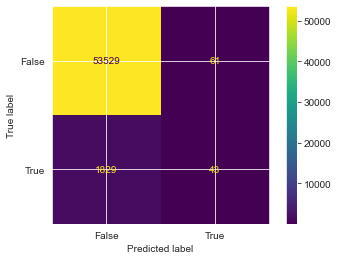

In [29]:
# Build the model

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(
    covid19_death_test[feats[:-2]], 
    covid19_death_test[feats[-1]],
    test_size=0.2,
    random_state=42)

num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, ["Altersgruppe"]),
    ("cat", cat_transfomer, ["Bundesland", "Landkreis", "Geschlecht"])
])

model = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression())
])

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)

### First Approach of resampling the data (Upsampling)

(221848, 5)
Dead:  7253
Not dead:  214595
Dead upsampled:  214595
              precision    recall  f1-score   support

       False       0.99      0.84      0.91     53590
        True       0.16      0.88      0.27      1872

    accuracy                           0.84     55462
   macro avg       0.58      0.86      0.59     55462
weighted avg       0.97      0.84      0.89     55462



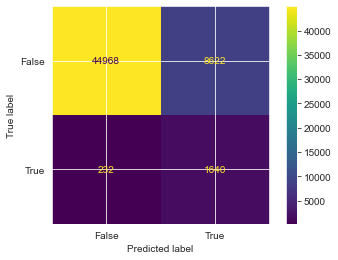

In [30]:
# Jetzt ohne Test-Anteil respamplen
from sklearn.utils import resample

X_train, X_test, y_train, y_test = train_test_split(
    covid19_death_test[feats[:-2]], 
    covid19_death_test[feats[-1]],
    test_size=0.2,
    random_state=42)

X_train["Deathcase"] = y_train

print(X_train.shape)

covid19_not_dead = X_train[X_train["Deathcase"] == False]
covid19_dead = X_train[X_train["Deathcase"] == True]

print("Dead: ", covid19_dead.count()[0])
print("Not dead: ", covid19_not_dead.count()[0])

# Doing the upsampling
covid19_dead_upsampled = resample(covid19_dead, 
                                  replace=True, 
                                  n_samples=covid19_not_dead.count()[0],
                                  random_state=42)
print("Dead upsampled: ", covid19_dead_upsampled.count()[0]) 

covid19_upsampled = pd.concat([covid19_not_dead, covid19_dead_upsampled])

X_train = covid19_upsampled[feats[:-2]]
y_train = covid19_upsampled["Deathcase"]

num_transformer = Pipeline([
    ("scaler", StandardScaler())
])

cat_transfomer = Pipeline([
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_transformer, ["Altersgruppe"]),
    ("cat", cat_transfomer, ["Bundesland", "Landkreis", "Geschlecht"])
])

model = Pipeline([
    ("pre", preprocessor),
    ("clf", LogisticRegression())
])

# train model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test)